In [123]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [124]:
data_orig=pd.read_csv("soidukid.csv",on_bad_lines='skip', sep=";")

C:\Users\Liis Reimand\AppData\Local\Temp\ipykernel_17384\1361949397.py:1: DtypeWarning: Columns (8,9,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data_orig=pd.read_csv("soidukid.csv",on_bad_lines='skip', sep=";")


In [125]:
#kopeerime originaalse andmestiku
data=data_orig.copy()

In [126]:
#kustutame ebavajalikud andmed
data=data[data.YLDINE_STAATUS != "PEATATUD"]
data=data.reset_index()
#data=data.drop(data[data["YLDINE_STAATUS"]=="PEATATUD"].index, inplace=True)
data=data.drop(["Andmed seisuga","index","VARV","ISTEKOHTI", "Kere nimetus", "ARV","Kategooria","Keretüüp","TELGI_KOKKU","TAISMASS", "TYHIMASS","YLDINE_STAATUS","EESTIS_ESMAREG_KP", "MOOTORI_TYYP", "Kütuse tüüp", "HYBRIIDI_TYYP"], axis=1)

In [127]:
#asendame Nan-informatsioonilahtrid käigukastitüübis
#Nan -> manuaal
data["KAIGUKASTI_TYYP"]=data["KAIGUKASTI_TYYP"].fillna("MANUAAL")

In [128]:
#asendame puuduvad NEDC väärtused võimalusel WLTP omadega, vastasel juhul
#eelistame NEDC

for i in range(len(data["CO2_NEDC"])):
    vana=data["CO2_NEDC"].iloc[i]
    uus=data["CO2_WLTP"].iloc[i]
    if str(vana)=="nan" and str(uus)!="nan":
        data.loc[i,'CO2_NEDC']=int(uus)
data=data.drop(["CO2_WLTP"], axis=1)        

In [142]:
data["CO2_NEDC"].isna().sum()

110280

In [130]:
#data.to_csv('soidukid_cleaned.csv',encoding='utf-8-sig',sep=';')

In [131]:
#VAZ-de CO2_NEDC NaN väärtused asendame 210-ga, kuna antud autod omavad sama mootorit
for i in range(len(data["CO2_NEDC"])):
    mark=data["Mark"].iloc[i]
    if str(mark)=="VAZ":
        data.loc[i,'CO2_NEDC']=210

In [132]:
#Vaatame autosid, millel on CO2 NaN-valued
#for i in range(len(data["CO2_NEDC"])):
 #  mark=data["Mark"].iloc[i]
  #  maht=data["MOOTORI_MAHT"].iloc[i]
   # tüüp=data["Kütusekombinatsioon"].iloc[i]
    #if str(NEDC)=="nan" and str(mark)=="BMW":
     #   print(str(data["Mark"].iloc[i])+ " " + str(data["Mudel"].iloc[i]) + " " + str(maht) + " " + str(tüüp))

BMW 316I 1596.0 BENSIIN
BMW 321 1971.0 BENSIIN
BMW 340 1971.0 BENSIIN
BMW 320 1977.0 BENSIIN
BMW 329 1898.0 BENSIIN
BMW 327 2120.0 BENSIIN
BMW 520I 1990.0 BENSIIN
BMW 525E 2674.0 BENSIIN
BMW 316 1754.0 BENSIIN
BMW 318I 1754.0 BENSIIN
BMW 525 2674.0 BENSIIN
BMW 520 1976.0 BENSIIN
BMW 524TD 2426.0 DIISEL
BMW 325E 2494.0 BENSIIN
BMW 520I 1976.0 BENSIIN
BMW 318I 1754.0 BENSIIN
BMW 318I 1783.0 BENSIIN
BMW 325I 2674.0 BENSIIN
BMW 730 2986.0 BENSIIN
BMW 320I 1977.0 BENSIIN
BMW 2000 1796.0 BENSIIN
BMW M5 3453.0 BENSIIN
BMW 316 2494.0 BENSIIN
BMW 728I 2788.0 BENSIIN
BMW 728I 2770.0 BENSIIN
BMW 1602 1573.0 BENSIIN
BMW 520I 1976.0 BENSIIN
BMW 528I 1766.0 BENSIIN
BMW 316 1573.0 BENSIIN
BMW 520I 1977.0 BENSIIN
BMW 732I 3210.0 BENSIIN
BMW 323I 2291.0 BENSIIN
BMW 520I 1976.0 BENSIIN
BMW 315 1563.0 BENSIIN
BMW 735I 3430.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 323I 2291.0 BENSIIN
BMW 525I 2494.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 525 3430.0 BENSIIN
BMW 323I 2291.0 BENSIIN
BMW 1602 1600.0 BENSIIN
BMW 525

BMW 525I 2494.0 BENSIIN
BMW 735I 3600.0 BENSIIN
BMW 320I 2171.0 BENSIIN
BMW 730I 2997.0 BENSIIN
BMW 525I 2494.0 BENSIIN
BMW 730I 2997.0 BENSIIN
BMW 330CI 2979.0 BENSIIN
BMW 316TI 1796.0 BENSIIN
BMW X5 4398.0 BENSIIN
BMW 316I 1.9 1895.0 BENSIIN
BMW 316 2793.0 BENSIIN
BMW X5 2979.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 740I 4398.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW X5 2979.0 BENSIIN
BMW X5 4619.0 BENSIIN
BMW 318I 1995.0 BENSIIN
BMW 745I L 4398.0 BENSIIN
BMW 528E 2692.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 316I 1895.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW 318I 1995.0 BENSIIN
BMW M3 3246.0 BENSIIN
BMW 524TD 2443.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 525I 2494.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 528I 2793.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 325I 2494.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 735I 3600.0 BENSIIN
BMW 535I 3498.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 520I 1991.0 BEN

BMW 325I 2494.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 316I 1.9 1895.0 BENSIIN
BMW X5 3.0D 2993.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 525I 2494.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 645CI 4398.0 BENSIIN
BMW 330XI 2979.0 BENSIIN
BMW 728I 2793.0 BENSIIN
BMW 530I 2997.0 BENSIIN
BMW 320D 1951.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 523I 2494.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW 735I L 3498.0 BENSIIN
BMW 525I 2494.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 320I 1976.0 BENSIIN
BMW 750I 4988.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW X5 3.0D 2993.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 520I 1990.0 BENSIIN
BMW 518I 1796.0 BENSIIN
BMW 525T 2494.0 BENSIIN
BMW 316I 2494.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 5

BMW 520I 1991.0 BENSIIN
BMW 330CI 2979.0 BENSIIN
BMW 316I 2926.0 DIISEL
BMW 523I 2494.0 BENSIIN
BMW 745I 4398.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 745I L 4398.0 BENSIIN
BMW 745I 4398.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 730D 2993.0 DIISEL
BMW 518I 1795.0 BENSIIN
BMW 735I 3600.0 BENSIIN
BMW 320IT 1991.0 BENSIIN
BMW 323I 2494.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW 318I 1795.0 BENSIIN
BMW 525TDS T 2497.0 DIISEL
BMW 520I T 1991.0 BENSIIN
BMW X5 3.0D 2993.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 735I 3430.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 328I 2793.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 316 1596.0 BENSIIN
BMW 530I 2979.0 BENSIIN
BMW 316I 2494.0 BENSIIN
BMW M5 3535.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 318I 2494.0 BENSIIN
BMW 728I 2793.0 BENSIIN
BMW 728I 2793.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 540I 3982.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 318TI 1796.0 BENSIIN
BMW 525I X 2494.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 325I 

BMW 316I 1596.0 BENSIIN
BMW 525TDS T 2497.0 DIISEL
BMW 523I 2494.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 520I 2171.0 BENSIIN
BMW 520I 2171.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 525 2494.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 725TDS 2497.0 DIISEL
BMW 520I 2171.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 540I 4398.0 BENSIIN
BMW 750I L 4988.0 BENSIIN
BMW 525TDS T 2497.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 325TDS 2497.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 525TDS 2926.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 525I 2494.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 525TDSA 2494.0 DIISEL
BMW 325I 2494.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 530I 2979.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 528I 2793.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 520I 2

BMW 320I 1991.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 318 1796.0 BENSIIN
BMW 725TDS 2497.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW X5 4398.0 BENSIIN
BMW 725TDS 2497.0 DIISEL
BMW 330D 2926.0 DIISEL
BMW 316 1596.0 BENSIIN
BMW 316I 2979.0 BENSIIN
BMW 320I 3982.0 BENSIIN
BMW 540I 4398.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 316I 1796.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 540I 4398.0 BENSIIN
BMW 520 1991.0 BENSIIN
BMW 750I 4988.0 BENSIIN
BMW 330XD 2926.0 DIISEL
BMW 323I 2494.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 728I 2793.0 BENSIIN
BMW 325TD 2497.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 525I X 2494.0 BENSIIN
BMW 528I 2793.0 BENSIIN
BMW 530I 2997.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 325I 2494.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 523I 2494.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 323I 2494.0 BENSIIN


BMW 316I 1596.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 320D 1950.0 DIISEL
BMW 320D 1950.0 DIISEL
BMW 316 1596.0 BENSIIN
BMW X5 3.0D 2993.0 DIISEL
BMW 316TI 1796.0 BENSIIN
BMW 318I 1990.0 BENSIIN
BMW 316TI 1796.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW X5 3.0D 2993.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW X5 2979.0 BENSIIN
BMW 320I 2171.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW X5 4398.0 BENSIIN-LPG
BMW 320I 1991.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 745I L 4398.0 BENSIIN
BMW 725TDS 2497.0 DIISEL
BMW 320D 1995.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 323TI 2494.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 318I 1990.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 330XD 2926.0 DIISEL
BMW 323I 3201.0 BENSIIN
BMW 330XD 2926.0 DIISEL
BMW Z3 1796.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 528I 2793.0 BENSIIN-LPG
BMW 316I 1596.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 524TD 1990

BMW 318I 1895.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 740I 3982.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 523I 2494.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 745I L 4398.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 540I 4398.0 BENSIIN
BMW 318IS 1796.0 BENSIIN
BMW 525TDS 2793.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 735I 3600.0 BENSIIN
BMW 730D 2993.0 DIISEL
BMW 740I 4398.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 320D 1950.0 DIISEL
BMW 540I 3982.0 BENSIIN
BMW 525TDS T 2497.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 523I 2494.0 BENSIIN
BMW 318TI 1895.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 528I 2793.0 BENSIIN
BMW 318TI 1796.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 520 1991.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 320D 1950.0 DIISEL
BMW 730I 2997.0 BENSIIN
BMW 316 1754.0 BENSIIN
BMW 316I 2793.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 320D 1951.0 D

BMW 525D 2497.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 525I 2494.0 BENSIIN
BMW 635 CSI 3406.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 320 1991.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 320D 1951.0 DIISEL
BMW 530I 2979.0 BENSIIN-LPG
BMW 320I 1991.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 318I 1991.0 BENSIIN
BMW 318IS 1796.0 BENSIIN
BMW 316I 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 735I 3498.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 525TD 2497.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 323CI 2494.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 540I 4398.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 320D 1951.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 530I 2997.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 520D 1951.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 330XD 2926.0 DIISEL
BMW 330XD 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 318IS 1796.0 BENSIIN
BMW 316I 1596.0 BE

BMW 318I 2494.0 BENSIIN
BMW 528I 2793.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 318D 1995.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 528I 2793.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 328I 2793.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 330I 2979.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 728I 2793.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 330CI 2979.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 535I 3498.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 525 2497.0 DIISEL
BMW 528I 2793.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 528I 2793.0 BENSIIN
BMW 730D 2993.0 DIISEL
BMW 318TDS 1665.0 DIISEL
BMW 740D 3901.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 320D 1951.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 316 1596.0 BENSIIN
BMW 316I 2494.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 318I 1990.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 316 2793.0 BENSIIN
BMW 735I 3498.0 BENSIIN
BMW 530I 2979.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 518I 1796.0 BENSIIN
BMW 318CI 1895.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW X

BMW 318I 1796.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 528I 2793.0 BENSIIN
BMW 320I 2979.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW X6 2979.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 316I 1.9 1895.0 BENSIIN
BMW 323CI 2494.0 BENSIIN
BMW 320I 2171.0 BENSIIN
BMW 735I 3498.0 BENSIIN
BMW 328XI 2996.0 BENSIIN
BMW 740I 4398.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 528I 2793.0 BENSIIN
BMW 323I 2494.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 530D T 2926.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 318I 1995.0 BENSIIN
BMW 730D 2926.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 325TDS 2497.0 DIISEL
BMW 525 2494.0 BENSIIN
BMW 320D 1951.0 DIISEL
BMW X5 4799.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 330D 2926.0 DIISEL
BMW X5 3.0D 2993.0 DIISEL
BMW 520I T 1991.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 525TDSA 2497.0 DIISEL
BMW 320D 1950.0 DIISEL
BMW 745I 439

BMW 330D 2926.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 325IX 2476.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 330D 2926.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 520I 2171.0 BENSIIN
BMW 320I 2979.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 725TDS 2497.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 323I 2494.0 BENSIIN
BMW 316IT 1596.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW Z3 2171.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW X5 2926.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 318CI 1895.0 BENSIIN-LPG
BMW 325TDS 2497.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 316I 1895.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW 325CI 2494.0 BENSIIN
BMW 328I 2793.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 520I 2171.0 BENSIIN
BMW 745LI 4398.0 

BMW 530D 2926.0 DIISEL
BMW 316 1570.0 BENSIIN
BMW 528I 2793.0 BENSIIN
BMW 530D 2993.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 520I 1976.0 BENSIIN
BMW 530XD 2993.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 525I 2494.0 BENSIIN
BMW 330XD 2926.0 DIISEL
BMW 525I X 2494.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 730I 2997.0 BENSIIN
BMW 730D 2993.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 535I 2979.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 728I 2793.0 BENSIIN
BMW 530D 2993.0 DIISEL
BMW 530D 2993.0 DIISEL
BMW 318TI 1796.0 BENSIIN
BMW 730D 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 118D 1995.0 DIISEL
BMW X5 3.0D 2993.0 DIISEL
BMW 330CI 2979.0 BENSIIN
BMW 725TDS 2497.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW 320D 1950.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW X5 2993.0 DIISEL
BMW 320D 1951.0 DIISEL
BMW 730I 2997.0 BENSIIN
BMW 325IX 2493.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BM

BMW 525TDS 2497.0 DIISEL
BMW X5 2926.0 DIISEL
BMW 635 CSI 3406.0 BENSIIN
BMW 325E 2674.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 735I 3600.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW X3 2993.0 DIISEL
BMW 318D 1995.0 DIISEL
BMW 318D 1995.0 DIISEL
BMW 740D 3901.0 DIISEL
BMW 530D 2993.0 DIISEL
BMW 530D 2993.0 DIISEL
BMW 320D 1995.0 DIISEL
BMW 530D 2993.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW X6 XDRIVE 40D 2993.0 DIISEL
BMW 330D 2926.0 DIISEL
BMW 528I 2996.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 328XI 2996.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 530D 2993.0 DIISEL
BMW X5 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 330XD 2926.0 DIISEL
BMW 530D 2993.0 DIISEL
BMW X5 2926.0 DIISEL
BMW X6 XDRIVE 40D 2993.0 DIISEL
BMW 328I 2793.0 BENSIIN
BMW 316TI 1796.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 523I 2494.0 BENSIIN
BMW 740D 3901.0 DIISEL
BMW 750LI 4395.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 530D 2993.0 DIISEL
BMW X

BMW 525D 2497.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 525D 2993.0 DIISEL
BMW 525I 2494.0 BENSIIN
BMW 320D 1995.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 535D 2993.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 525D 1995.0 DIISEL
BMW 316I 2979.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 518I 1796.0 BENSIIN
BMW X6 XDRIVE 35D 2993.0 DIISEL
BMW 330D 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 730D 2993.0 DIISEL
BMW 328I 2793.0 BENSIIN
BMW 730D 2993.0 DIISEL
BMW 730D 2926.0 DIISEL
BMW 320D 1995.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 740D 3901.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 730D 2993.0 DIISEL
BMW 525D 2993.0 DIISEL
BMW 535D 2993.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 330XD 2926.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW X5 XDRIVE 30D 2993.0 DIISEL
BMW 520D 1995.0 DIISEL
BMW X5 3.0D 2993.0 DIISEL
BMW 320D 1950.0 DIISEL
BMW 640D 2993.0 DIISEL
BMW 320D 1951.0 DIISEL
BMW 318D 1995.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 525XD 2993.0 DIISEL


BMW 318D 1995.0 DIISEL
BMW 530I 2979.0 BENSIIN
BMW 525I 2996.0 BENSIIN
BMW 730D 2993.0 DIISEL
BMW 525TD 2497.0 DIISEL
BMW 740D 3901.0 DIISEL
BMW 530D XDRIVE 2993.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 525D XDRIVE 1995.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 316I 1754.0 BENSIIN
BMW 318I 1995.0 BENSIIN
BMW 316TI 1796.0 BENSIIN
BMW 730D 2993.0 DIISEL
BMW 318TI 2793.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 320I 2171.0 BENSIIN
BMW 320D 1951.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 530D 2993.0 DIISEL
BMW 318CI 1995.0 BENSIIN
BMW 316I 1.9 1895.0 BENSIIN
BMW 316TI 1796.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW X5 3.0D 2993.0 DIISEL
BMW 520D 1951.0 DIISEL
BMW 730D 2926.0 DIISEL
BMW 316TI 1796.0 BENSIIN
BMW X3 3.0D 2993.0 DIISEL
BMW 318I 1991.0 BENSIIN
BMW 318D 1995.0 DIISEL
BMW 530D XDRIVE 2993.0 DIISEL
BMW 523I 2494.0 BENSIIN
BMW 528I 2996.0 BENSIIN
BMW 330XI 2979.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 

BMW 316I 1.9 1895.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 728I 2793.0 BENSIIN
BMW 318TDS 1665.0 DIISEL
BMW 645CI 4398.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 116I 1596.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 320D 1995.0 DIISEL
BMW 525D 2497.0 DIISEL
BMW 318I 1995.0 BENSIIN
BMW 2002 TI 1990.0 BENSIIN
BMW 320D 1995.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 730D 2993.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 318CI 1995.0 BENSIIN
BMW 330CI 2979.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 735I 3600.0 BENSIIN
BMW 850I 4988.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 318IS 1796.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 318IS 1796.0 BENSIIN
BMW 320D 1995.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 325CI 2494.0 BENSIIN
BMW 316I 2494.0 BENSIIN
BMW 540I 4398.0 BENSIIN
BMW 320I 2171.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW Z3 1796.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 330XD 2926.0 DIISEL
BMW 525I 2494.0 BENS

BMW 318I 1796.0 BENSIIN
BMW 520I 2171.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 318TI 1995.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 315 1563.0 BENSIIN
BMW 323CI 4398.0 BENSIIN
BMW 330CI 2979.0 BENSIIN
BMW 318I 1995.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW 325XI 2494.0 BENSIIN
BMW 730D 2926.0 DIISEL
BMW 330I 2996.0 BENSIIN
BMW 318D 1951.0 DIISEL
BMW 525I 2494.0 BENSIIN
BMW 520I 2171.0 BENSIIN
BMW X5 3.0D 2993.0 DIISEL
BMW 318CI 1895.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW 328I 2793.0 BENSIIN
BMW X5 3.0D 2993.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 318D 1995.0 DIISEL
BMW 325CI 2494.0 BENSIIN
BMW 328I 2793.0 BENSIIN
BMW X5 3.0D 2993.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 530D 2993.0 DIISEL
BMW 730D 2993.0 DIISEL
BMW 318I 1895.0 BENSIIN
BMW X3 2.0D 1995.0 DIISEL
BMW 335I 2979.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 730D 2993.0 DIISEL
BMW X3 XDRIVE 20D 1995.0 DIISEL
BMW 320I 2171.0 BENSIIN
BMW 520I 2171.0 BENSIIN
BMW 316TI 1796.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 

BMW X5 4619.0 BENSIIN
BMW 730D 2993.0 DIISEL
BMW 330D 2926.0 DIISEL
BMW 525TDS 2497.0 DIISEL
BMW 520I 2171.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 318I 1995.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW X5 3.0D 2993.0 DIISEL
BMW 518I 2926.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 520I 1991.0 BENSIIN
BMW 320D 1995.0 DIISEL
BMW 318TI 1995.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 318I 1995.0 BENSIIN
BMW 320I 1995.0 BENSIIN
BMW 320D XDRIVE 1995.0 DIISEL
BMW 523I 2494.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW X5 3.0D 2993.0 DIISEL
BMW 328CI 2793.0 BENSIIN
BMW 120D 1995.0 DIISEL
BMW 316I 1596.0 BENSIIN
BMW 730I L 2997.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 318I 2494.0 BENSIIN
BMW 635 CSI 3430.0 BENSIIN
BMW X5 3.0D 2993.0 DIISEL
BMW X5 3.0D 2993.0 DIISEL
BMW 318D 1951.0 DIISEL
BMW 325I 2494.0 BENSIIN
BMW 525TD 2497.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 320I 2

BMW 525D 2497.0 DIISEL
BMW 730D 2926.0 DIISEL
BMW 323I 2494.0 BENSIIN
BMW 328CI 2793.0 BENSIIN
BMW 735I 3498.0 BENSIIN-LPG
BMW 120D 1995.0 DIISEL
BMW 320I XDRIVE 1997.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 328I 2793.0 BENSIIN
BMW 520D 1995.0 DIISEL
BMW 330I 2979.0 BENSIIN
BMW 318CI 1995.0 BENSIIN
BMW 318D 1951.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW X1 SDRIVE28I 1997.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW 320CI 2171.0 BENSIIN
BMW 318CI 1895.0 BENSIIN
BMW 850IA 4988.0 BENSIIN
BMW 318I 1895.0 BENSIIN
BMW 335I 2979.0 BENSIIN
BMW 650I 4395.0 BENSIIN
BMW 525TD 2497.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 328CI 2793.0 BENSIIN-LPG
BMW 530D 2926.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW X5 3.0D 2993.0 DIISEL
BMW 730D 2993.0 DIISEL
BMW 530D 2926.0 DIISEL
BMW 525I 2494.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW 530I 2979.0 BENSIIN
BMW 318IS/1 1991.0 BENSIIN
BMW 330D 2926.0 DIISEL
BMW 318IS 1796.0 BENSIIN
BMW 750LI 4395.0 BENSIIN
BMW 320I 1995.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 530D XDRIVE 2993.

BMW Z3 1895.0 BENSIIN
BMW Z4 SDRIVE 35I 2979.0 BENSIIN
BMW 735I 3430.0 BENSIIN
BMW 316I 1796.0 BENSIIN
BMW 325I 2494.0 BENSIIN
BMW 750I 4799.0 BENSIIN
BMW 318IS 1796.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 318I 1995.0 BENSIIN
BMW X5 XDRIVE 35D 2993.0 DIISEL
BMW 318 1796.0 BENSIIN
BMW 330D 2993.0 DIISEL
BMW 745I 3430.0 BENSIIN
BMW X6 XDRIVE 40D 2993.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 745I 4398.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 523I 2494.0 BENSIIN
BMW X3 1995.0 BENSIIN
BMW M235I 2979.0 BENSIIN
BMW 318IS 2494.0 BENSIIN
BMW 525E 2693.0 BENSIIN
BMW 320I 1991.0 BENSIIN
BMW 525TDSA 2497.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 325I 2494.0 BENSIIN
BMW 530D 2926.0 DIISEL
BMW 530D 2993.0 DIISEL
BMW 524TD 2426.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW Z4 2979.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 525TD 2926.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 318I 2793.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 525D 2993.0 DIISEL
BMW 330CI 2979.0 BENSIIN


BMW Z3 1796.0 BENSIIN
BMW 640I 2979.0 BENSIIN
BMW 325I 2497.0 BENSIIN
BMW 525D 2497.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW 318I 1783.0 BENSIIN
BMW 740I 4000.0 BENSIIN
BMW ACTIVEHYBRID 7 4395.0 BENSIIN-ELEKTER
BMW 328I 2793.0 BENSIIN
BMW 316I 2494.0 BENSIIN
BMW 318I 1995.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 525XD 2993.0 DIISEL
BMW 316TI 1796.0 BENSIIN
BMW 321 1971.0 BENSIIN
BMW 118D 1995.0 DIISEL
BMW 318TDS 1665.0 DIISEL
BMW 120D 2997.0 BENSIIN
BMW 325CI 2494.0 BENSIIN
BMW 520I 1991.0 BENSIIN
BMW 318IS 1796.0 BENSIIN
BMW 525TDS 2497.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 540IA 3982.0 BENSIIN
BMW 320CI 2171.0 BENSIIN
BMW 316I 1596.0 BENSIIN
BMW 518I 1796.0 BENSIIN-LPG
BMW 530D 2993.0 DIISEL
BMW 740D XDRIVE 2993.0 DIISEL
BMW X6 4395.0 BENSIIN
BMW 520I 1998.0 BENSIIN
BMW 330CI 2979.0 BENSIIN
BMW 316 1766.0 BENSIIN
BMW 330XD 2993.0 DIISEL
BMW M3 2302.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW X5 2926.0 DIISEL
BMW 330XI 2996.0 BENS

BMW 501 2077.0 BENSIIN
BMW 1500 1499.0 BENSIIN
BMW M3 3246.0 BENSIIN
BMW 323I 2291.0 BENSIIN
BMW 525 2497.0 DIISEL
BMW X7 XDRIVE30D 2993.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 535D 2993.0 DIISEL
BMW 330D 2926.0 DIISEL
BMW 318I 1796.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 428I XDRIVE 1997.0 BENSIIN
BMW 320D 1995.0 DIISEL
BMW M235I 2979.0 BENSIIN
BMW X5 4398.0 BENSIIN
BMW X5 XDRIVE 30D 2993.0 DIISEL-ELEKTER
BMW M 535I 3430.0 BENSIIN
BMW Z4 2171.0 BENSIIN
BMW 520D 1995.0 DIISEL
BMW 735I 3430.0 BENSIIN
BMW 730D 2926.0 DIISEL
BMW 330D 2993.0 DIISEL
BMW 118I 1499.0 BENSIIN
BMW M4 2979.0 BENSIIN
BMW M5 4999.0 BENSIIN
BMW IX XDRIVE50 0.0 ELEKTER
BMW 328I 1997.0 BENSIIN
BMW 328I 2996.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 323I 2494.0 BENSIIN
BMW 318I 1796.0 BENSIIN
BMW 428I 1997.0 BENSIIN
BMW 328I 2793.0 BENSIIN
BMW X1 XDRIVE 28I 1998.0 BENSIIN
BMW 730I 2986.0 BENSIIN
BMW 316I 1590.0 BENSIIN
BMW X5 XDRIVE 40D 2993.0 DIISEL
BMW 320I 1991.0 BENSIIN
BMW IX XDRIVE40 0.0 ELEKTER
BMW 740I 2979.0 BENSIIN
B

In [133]:
#Peamised mootorid ning nende CO2_NEDC, et vähendada NaN valuesid CO2 tulbas
motoras_VW={1968.0:146.0, 1896.0:162.0, 2461.0:171.0, 2771.0:255.0, 2967.0:180.0 ,1781.0:190.0, 2792.0:278.0}
motoras_BMW={1596.0:171.6, 1991.0:165.3, 2979.0:169.0, 2993.0:170.0, 2926.0:178.0, 1995.0:153.0, 1796.0:208.0, 1950.0:158.0  }

In [134]:
#Asendame NaN-valued võimalusel Volkswageni ja Audi peamiste mootorite CO2 reostustasemed
for i in range(len(data["CO2_NEDC"])):
    mootor=data["MOOTORI_MAHT"].iloc[i]
    NEDC=data["CO2_NEDC"].iloc[i]
    mark=data["Mark"].iloc[i]
    if str(NEDC)=="nan" and float(mootor) in motoras_VW.keys() and (str(mark)=="VOLKSWAGEN" or str(mark)=="AUDI"):
        data.loc[i,'CO2_NEDC']=int(motoras_VW.get(float(mootor)))

In [135]:
#Asendame NaN-valued võimalusel BMW peamiste mootorite CO2 reostustasemed
for i in range(len(data["CO2_NEDC"])):
    mootor=data["MOOTORI_MAHT"].iloc[i]
    NEDC=data["CO2_NEDC"].iloc[i]
    mark=data["Mark"].iloc[i]
    if str(NEDC)=="nan" and float(mootor) in motoras_BMW.keys() and str(mark)=="BMW":
        data.loc[i,'CO2_NEDC']=int(motoras_BMW.get(float(mootor)))

In [141]:
#Asendame NaN-valued elektri-autodel nulliga
for i in range(len(data["CO2_NEDC"])):
    kütus=data["Kütusekombinatsioon"].iloc[i]
    NEDC=data["CO2_NEDC"].iloc[i]
    if str(NEDC)=="nan" and str(kütus)=="ELEKTER":
        data.loc[i,'CO2_NEDC']=0

In [136]:
brändid={}
for i in range(len(data["CO2_NEDC"])):
    NEDC=data["CO2_NEDC"].iloc[i]
    if str(NEDC)=="nan":
        if str(data["Mark"].iloc[i]) in brändid.keys():
            brändid[str(data["Mark"].iloc[i])]= int(brändid.get(str(data["Mark"].iloc[i])))+1
        else:
            brändid[str(data["Mark"].iloc[i])]= 1             
brändid=dict(sorted(brändid.items(), key=lambda item: item[1]))
#print(brändid)

{'TATRA': 1, 'HANSA': 1, 'TALBOT': 1, 'ZUK': 1, 'S': 1, 'BARKAS': 1, 'IFA': 1, 'REX': 1, 'GRANDIN': 1, 'WHIPPET SIX': 1, 'FREIGHTLINER DAMON': 1, 'FIAT MÜNSTERLAND': 1, 'KOBER': 1, 'HANOMAG-HENSCHEL': 1, 'MAHINDRA': 1, 'MAN JONCKHEERE': 1, 'AUSTIN-HEALEY': 1, 'BRICKLIN': 1, 'JENSEN-HEALEY': 1, 'EVERET-MORRISON MOTORCARS': 1, 'BEDFORD': 1, 'JAGUAR ARDEN': 1, 'OAKLAND': 1, 'CHAUSSON TRIGANO': 1, 'FIAT CONCORDE': 1, 'IVECO DETHLEFFS': 1, 'RENAULT HYMER': 1, 'VOLVO LAHTI': 1, 'WARTBURG': 1, 'RENAULT HOBBY': 1, 'CONCORDE': 1, 'MERCEDES-BENZ HEHN': 1, 'OLTCIT': 1, 'CITROEN GIOTTILINE': 1, 'DAF': 1, 'STEYR-PUCH': 1, 'VOLVO NILSSON': 1, 'MERCEDES-BENZ NOTIN': 1, 'CARBODIES': 1, 'SCANIA KIITOKORI': 1, 'MERCEDES-BENZ RETTENMAIER': 1, 'RENAULT ELDDIS': 1, 'FIAT GIOTTILINE': 1, 'RENAULT KENTUCKY CAMP': 1, 'SCANIA VEST': 1, 'IVECO-LAIKA': 1, 'ZIMMER': 1, 'AUDI-PORSCHE': 1, 'CITROEN IIC': 1, 'SANTANA': 1, 'WHIPPET': 1, 'HILLMAN': 1, 'SCHULZ': 1, 'RENAULT STX': 1, 'FIAT-WILK': 1, 'CITROEN TRIGANO': 1

In [162]:
#Asendame vigased maakonna nimed
tundmatud=['L��NE-VIRU MAAKOND', 'P�RNU MAAKOND', 'J�RVA MAAKOND', 'P�LVA MAAKOND', 'V�RU MAAKOND']
asendused=["LÄÄNE-VIRU MAAKOND", "PÄRNU MAAKOND", "JÄRVA MAAKOND", "PÕLVA MAAKOND", "VÕRU MAAKOND"]

for i in range(len(tundmatud)):
    data["VK/OM MAAKOND"]=data["VK/OM MAAKOND"].replace([tundmatud[i]],asendused[i])
    
MAAKONNAD=[]
for i in range(len(data["VK/OM MAAKOND"])):
    maakond=data["VK/OM MAAKOND"].iloc[i]
    if str(maakond) not in MAAKONNAD:
        MAAKONNAD.append(str(maakond))
        

print(MAAKONNAD)

['HARJU MAAKOND', 'PÄRNU MAAKOND', 'TARTU MAAKOND', 'VALGA MAAKOND', 'VÕRU MAAKOND', 'HIIU MAAKOND', 'PÕLVA MAAKOND', 'SAARE MAAKOND', 'LÄÄNE-VIRU MAAKOND', 'IDA-VIRU MAAKOND', 'JÕGEVA MAAKOND', 'LÄÄNE MAAKOND', 'RAPLA MAAKOND', 'VILJANDI MAAKOND', 'JÄRVA MAAKOND', 'MÄÄRAMATA']


In [165]:
autod_maakonnas={'HARJU MAAKOND':0, 'PÄRNU MAAKOND':0, 'TARTU MAAKOND':0, 'VALGA MAAKOND':0, 'VÕRU MAAKOND':0, 'HIIU MAAKOND':0, 'PÕLVA MAAKOND':0, 'SAARE MAAKOND':0, 'LÄÄNE-VIRU MAAKOND':0, 'IDA-VIRU MAAKOND':0, 'JÕGEVA MAAKOND':0, 'LÄÄNE MAAKOND':0, 'RAPLA MAAKOND':0, 'VILJANDI MAAKOND':0, 'JÄRVA MAAKOND':0, 'MÄÄRAMATA':0}
passatid_maakonnas={'HARJU MAAKOND':0, 'PÄRNU MAAKOND':0, 'TARTU MAAKOND':0, 'VALGA MAAKOND':0, 'VÕRU MAAKOND':0, 'HIIU MAAKOND':0, 'PÕLVA MAAKOND':0, 'SAARE MAAKOND':0, 'LÄÄNE-VIRU MAAKOND':0, 'IDA-VIRU MAAKOND':0, 'JÕGEVA MAAKOND':0, 'LÄÄNE MAAKOND':0, 'RAPLA MAAKOND':0, 'VILJANDI MAAKOND':0, 'JÄRVA MAAKOND':0, 'MÄÄRAMATA':0}
passatid_kokku=0

for i in range(len(data["VK/OM MAAKOND"])):
    mudel=data["Mudel"].iloc[i]
    maakond=data["VK/OM MAAKOND"].iloc[i]
    autod_maakonnas[str(maakond)]= int(autod_maakonnas.get(str(maakond)))+1
    if "PASSAT" in str(mudel):
        passatid_kokku+=1
        passatid_maakonnas[str(maakond)]= int(passatid_maakonnas.get(str(maakond)))+1

print("Passateid Eestis " + str(passatid_kokku))
print(autod_maakonnas)
print(passatid_maakonnas)

Passateid Eestis 29261
{'HARJU MAAKOND': 281403, 'PÄRNU MAAKOND': 42387, 'TARTU MAAKOND': 74682, 'VALGA MAAKOND': 14754, 'VÕRU MAAKOND': 20159, 'HIIU MAAKOND': 6339, 'PÕLVA MAAKOND': 15091, 'SAARE MAAKOND': 20174, 'LÄÄNE-VIRU MAAKOND': 29375, 'IDA-VIRU MAAKOND': 48605, 'JÕGEVA MAAKOND': 14729, 'LÄÄNE MAAKOND': 10963, 'RAPLA MAAKOND': 18914, 'VILJANDI MAAKOND': 24343, 'JÄRVA MAAKOND': 15828, 'MÄÄRAMATA': 11487}
{'HARJU MAAKOND': 8835, 'PÄRNU MAAKOND': 2027, 'TARTU MAAKOND': 4346, 'VALGA MAAKOND': 1055, 'VÕRU MAAKOND': 1833, 'HIIU MAAKOND': 276, 'PÕLVA MAAKOND': 1419, 'SAARE MAAKOND': 816, 'LÄÄNE-VIRU MAAKOND': 1317, 'IDA-VIRU MAAKOND': 2101, 'JÕGEVA MAAKOND': 995, 'LÄÄNE MAAKOND': 479, 'RAPLA MAAKOND': 876, 'VILJANDI MAAKOND': 1462, 'JÄRVA MAAKOND': 830, 'MÄÄRAMATA': 594}


In [166]:
for i in range(len(autod_maakonnas)):
    print("Passateid " + str(MAAKONNAD[i]) +" "+ str(round((passatid_maakonnas.get(MAAKONNAD[i])/autod_maakonnas.get(MAAKONNAD[i]))*100,2))+ " %")

Passateid HARJU MAAKOND 3.14 %
Passateid PÄRNU MAAKOND 4.78 %
Passateid TARTU MAAKOND 5.82 %
Passateid VALGA MAAKOND 7.15 %
Passateid VÕRU MAAKOND 9.09 %
Passateid HIIU MAAKOND 4.35 %
Passateid PÕLVA MAAKOND 9.4 %
Passateid SAARE MAAKOND 4.04 %
Passateid LÄÄNE-VIRU MAAKOND 4.48 %
Passateid IDA-VIRU MAAKOND 4.32 %
Passateid JÕGEVA MAAKOND 6.76 %
Passateid LÄÄNE MAAKOND 4.37 %
Passateid RAPLA MAAKOND 4.63 %
Passateid VILJANDI MAAKOND 6.01 %
Passateid JÄRVA MAAKOND 5.24 %
Passateid MÄÄRAMATA 5.17 %


In [179]:
CO2_maakonnas={'HARJU MAAKOND':0, 'PÄRNU MAAKOND':0, 'TARTU MAAKOND':0, 'VALGA MAAKOND':0, 'VÕRU MAAKOND':0, 'HIIU MAAKOND':0, 'PÕLVA MAAKOND':0, 'SAARE MAAKOND':0, 'LÄÄNE-VIRU MAAKOND':0, 'IDA-VIRU MAAKOND':0, 'JÕGEVA MAAKOND':0, 'LÄÄNE MAAKOND':0, 'RAPLA MAAKOND':0, 'VILJANDI MAAKOND':0, 'JÄRVA MAAKOND':0, 'MÄÄRAMATA':0}

for i in range(len(data["CO2_NEDC"])):
    maakond=data["VK/OM MAAKOND"].iloc[i]
    co=data["CO2_NEDC"].iloc[i]
    if str(co)!="nan":
        CO2_maakonnas[str(maakond)]= float(CO2_maakonnas.get(str(maakond))) + float(data["CO2_NEDC"].iloc[i])

print(CO2_maakonnas)

{'HARJU MAAKOND': 38121742.0, 'PÄRNU MAAKOND': 5528375.0, 'TARTU MAAKOND': 9886978.0, 'VALGA MAAKOND': 1892449.0, 'VÕRU MAAKOND': 2561644.0, 'HIIU MAAKOND': 799965.0, 'PÕLVA MAAKOND': 1903384.0, 'SAARE MAAKOND': 2505773.0, 'LÄÄNE-VIRU MAAKOND': 3792516.0, 'IDA-VIRU MAAKOND': 6663427.0, 'JÕGEVA MAAKOND': 1903227.0, 'LÄÄNE MAAKOND': 1398186.0, 'RAPLA MAAKOND': 2453090.0, 'VILJANDI MAAKOND': 3105188.0, 'JÄRVA MAAKOND': 2059121.0, 'MÄÄRAMATA': 1543695.0}


In [184]:
CO2_maakonniti=[]
for i in range(len(autod_maakonnas)):
    print("CO2 reostus: " + str(MAAKONNAD[i]) +" "+ str(round((CO2_maakonnas.get(MAAKONNAD[i])/autod_maakonnas.get(MAAKONNAD[i])),2))+ " g/km")
    CO2_maakonniti.append(round((CO2_maakonnas.get(MAAKONNAD[i])/autod_maakonnas.get(MAAKONNAD[i])),2))

print(CO2_maakonniti)

CO2 reostus: HARJU MAAKOND 135.47 g/km
CO2 reostus: PÄRNU MAAKOND 130.43 g/km
CO2 reostus: TARTU MAAKOND 132.39 g/km
CO2 reostus: VALGA MAAKOND 128.27 g/km
CO2 reostus: VÕRU MAAKOND 127.07 g/km
CO2 reostus: HIIU MAAKOND 126.2 g/km
CO2 reostus: PÕLVA MAAKOND 126.13 g/km
CO2 reostus: SAARE MAAKOND 124.21 g/km
CO2 reostus: LÄÄNE-VIRU MAAKOND 129.11 g/km
CO2 reostus: IDA-VIRU MAAKOND 137.09 g/km
CO2 reostus: JÕGEVA MAAKOND 129.22 g/km
CO2 reostus: LÄÄNE MAAKOND 127.54 g/km
CO2 reostus: RAPLA MAAKOND 129.7 g/km
CO2 reostus: VILJANDI MAAKOND 127.56 g/km
CO2 reostus: JÄRVA MAAKOND 130.09 g/km
CO2 reostus: MÄÄRAMATA 134.39 g/km
[135.47, 130.43, 132.39, 128.27, 127.07, 126.2, 126.13, 124.21, 129.11, 137.09, 129.22, 127.54, 129.7, 127.56, 130.09, 134.39]


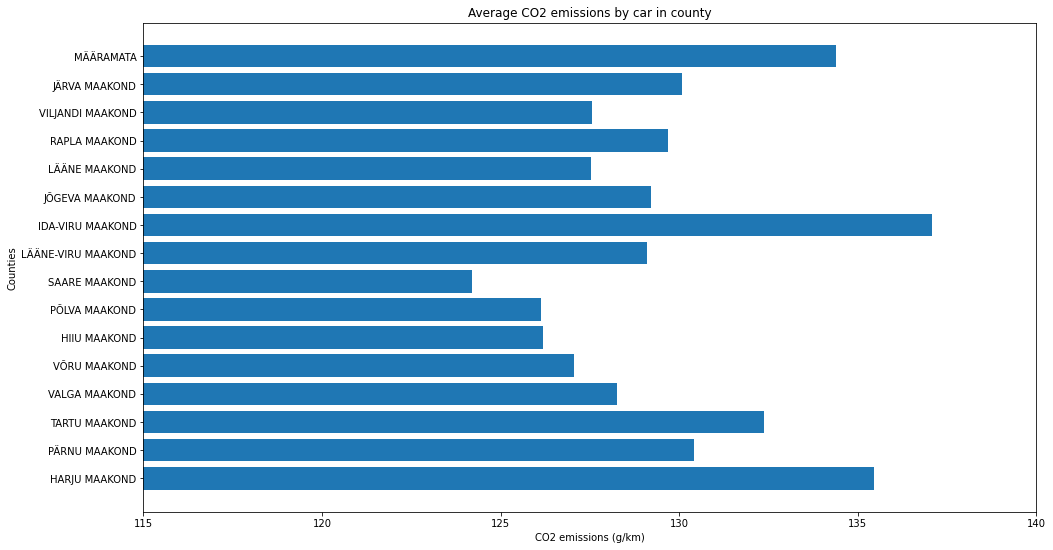

In [203]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize =(16, 9))

#bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.barh(MAAKONNAD, CO2_maakonniti)

ax.set_xlabel('CO2 emissions (g/km)')
ax.set_ylabel('Counties')
ax.set_title('Average CO2 emissions by car in county')

plt.xlim([115,140])

plt.show()

In [206]:

margid={}
for i in range(len(data["Mark"])):
    mark=data["Mark"].iloc[i]
    if str(mark) not in margid:
        margid[str(mark)]=0  

print(margid)

{'NISSAN': 0, 'VAUXHALL': 0, 'GAZ': 0, 'AZLK': 0, 'VAZ': 0, 'UAZ': 0, 'IZ': 0, 'OPEL': 0, 'ZAZ': 0, 'LUAZ': 0, 'SUZUKI': 0, 'FORD': 0, 'MITSUBISHI': 0, 'BMW': 0, 'DAIHATSU': 0, 'SKODA': 0, 'MERCEDES-BENZ': 0, 'WANDERER': 0, 'BUICK': 0, 'VOLKSWAGEN': 0, 'DKW': 0, 'MZMA': 0, 'MOSKVITŠ': 0, 'FIAT': 0, 'ZIS': 0, 'ISUZU': 0, 'SAAB': 0, 'AMC': 0, 'ADLER': 0, 'VOLVO': 0, 'LAND ROVER': 0, 'TATRA': 0, 'HANSA': 0, 'AUDI': 0, 'JEEP': 0, 'RAF': 0, 'CADILLAC': 0, 'DODGE': 0, 'TALBOT': 0, 'NYSA': 0, 'TOYOTA': 0, 'STEYR': 0, 'CHEVROLET': 0, 'MAZDA': 0, 'MASERATI': 0, 'ZUK': 0, 'KAVZ': 0, 'OMAVALMISTATUD': 0, 'TRABANT': 0, 'S': 0, 'DATSUN': 0, 'PONTIAC': 0, 'PORSCHE': 0, 'PEUGEOT': 0, 'HONDA': 0, 'JAGUAR': 0, 'HYUNDAI': 0, 'RENAULT': 0, 'CITROEN': 0, 'ALFA ROMEO': 0, 'OLDSMOBILE': 0, 'ROVER': 0, 'BARKAS': 0, 'GMC': 0, 'PLYMOUTH': 0, 'SEAT': 0, 'CHRYSLER': 0, 'IFA': 0, 'LINCOLN': 0, 'EAGLE': 0, 'SUBARU': 0, 'KIA': 0, 'DAEWOO': 0, 'MERCURY': 0, 'LEXUS': 0, 'REX': 0, 'SIMCA': 0, 'SSANGYONG': 0, 'TRIUMPH'

In [209]:
for i in range(len(data["Mark"])):
    mark=data["Mark"].iloc[i]
    margid[str(mark)]=margid.get(str(mark))+1
margid=dict(sorted(margid.items(), key=lambda item: item[1]))
print(margid)

{'TATRA': 2, 'HANSA': 2, 'TALBOT': 2, 'ZUK': 2, 'S': 2, 'BARKAS': 2, 'IFA': 2, 'REX': 2, 'GRANDIN': 2, 'WHIPPET SIX': 2, 'FREIGHTLINER DAMON': 2, 'FIAT MÜNSTERLAND': 2, 'KOBER': 2, 'VOLKSWAGEN MÜLLER': 2, 'HANOMAG-HENSCHEL': 2, 'MAHINDRA': 2, 'MAN JONCKHEERE': 2, 'AUSTIN-HEALEY': 2, 'BRICKLIN': 2, 'MERCEDES-BENZ POLLMANN': 2, 'JENSEN-HEALEY': 2, 'EVERET-MORRISON MOTORCARS': 2, 'BEDFORD': 2, 'JAGUAR ARDEN': 2, 'OAKLAND': 2, 'CHAUSSON TRIGANO': 2, 'FIAT CONCORDE': 2, 'IVECO DETHLEFFS': 2, 'RENAULT HYMER': 2, 'VOLVO LAHTI': 2, 'WARTBURG': 2, 'RENAULT HOBBY': 2, 'MIA': 2, 'CONCORDE': 2, 'MERCEDES-BENZ HEHN': 2, 'OLTCIT': 2, 'JAGUAR LAND ROVER LIMITED': 2, 'DAF': 2, 'STEYR-PUCH': 2, 'MERCEDES-BENZ NOTIN': 2, 'CARBODIES': 2, 'SCANIA KIITOKORI': 2, 'MERCEDES-BENZ RETTENMAIER': 2, 'RENAULT ELDDIS': 2, 'RENAULT LUANO CAMP': 2, 'SCANIA VEST': 2, 'IVECO-LAIKA': 2, 'ZIMMER': 2, 'AUDI-PORSCHE': 2, 'CITROEN IIC': 2, 'FISKER': 2, 'MERCEDES-BENZ LA STRADA': 2, 'WHIPPET': 2, 'HILLMAN': 2, 'SCHULZ': 2, 

In [140]:
data.tail(60)

,ESMANE_REG_KP,KAIGUKASTI_TYYP,MOOTORI_MAHT,MOOTORI_VOIMSUS,Kütusekombinatsioon,CO2_NEDC,Mark,Mudel,REG_MASS,HEITMENORM,VK/OM MAAKOND
649173,30.08.2013,MANUAAL,1461.0,66,DIISEL,118.0,DACIA,DOKKER,1854,EURO5,MÄÄRAMATA
649174,07.06.2011,AUTOMAAT,2987.0,177,DIISEL,218.0,JEEP,GRAND CHEROKEE,2949,EURO5,MÄÄRAMATA
649175,30.11.2022,CVT,2487.0,131,BENSIIN-ELEKTER,131.0,TOYOTA,RAV4,2225,EURO 6 AP,MÄÄRAMATA
649176,30.05.2007,AUTOMAAT,4134.0,240,DIISEL,294.0,AUDI,Q7,3245,EURO4,MÄÄRAMATA
649177,30.11.2022,CVT,2487.0,131,BENSIIN-ELEKTER,131.0,TOYOTA,RAV4,2225,EURO 6 AP,MÄÄRAMATA
649178,03.05.2018,AUTOMAAT,1984.0,185,BENSIIN-ELEKTER,147.0,AUDI,A5 SPORTBACK,2130,EURO6,MÄÄRAMATA
649179,08.03.2001,MANUAAL,1895.0,77,BENSIIN,NaN,BMW,316I,1785,EURO3,MÄÄRAMATA
649180,09.09.2022,AUTOMAAT,1995.0,140,DIISEL-ELEKTER,138.0,BMW,420D XDRIVE,2315,EURO 6 AP,MÄÄRAMATA
649181,30.11.2022,MANUAAL,999.0,81,BENSIIN,129.0,DACIA,JOGGER,1862,EURO 6 AP,MÄÄRAMATA
649182,06.01.2004,AUTOMAAT,2401.0,120,DIISEL,201.0,VOLVO,S60,2050,EURO3,MÄÄRAMATA
